# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

## 1. Installation of Qiskit

In [1]:
%pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import qiskit as qi
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import plot_histogram

In [1]:
from sympy import *

## 2. Quantum Gates

In [10]:
two = 1/np.sqrt(2)

In [13]:
A = Matrix([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, two, two],[0, 0, two, -two]])

In [9]:
a, b, c, d = symbols('a b c d')
state_vector = Matrix([[a], [b], [c], [d]])

In [14]:
display(A * state_vector)

Matrix([
[                                        a],
[                                       -b],
[0.707106781186547*c + 0.707106781186547*d],
[0.707106781186547*c - 0.707106781186547*d]])

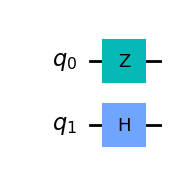

In [6]:
circ_1 = QuantumCircuit(2)
circ_1.z(0)
circ_1.h(1)
circ_1.draw('mpl')

In the standard computational basis, this two-qubit system can be written as,
$$\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix} \begin{pmatrix}
\alpha \\
\beta \\
\gamma \\
\delta
\end{pmatrix} = \begin{pmatrix}
\alpha \\
-\beta \\
\frac{\gamma}{\sqrt{2}} + \frac{\delta}{\sqrt{2}} \\
\frac{\gamma}{\sqrt{2}} - \frac{\delta}{\sqrt{2}} 
\end{pmatrix}$$

We can double check this using qiskit,


Total count for 00 and 11 are: {'00': 0.5, '10': 0.5}
Measurement outcome: 00, Post-measurement state: \frac{\sqrt{2}}{2} |00>+\frac{\sqrt{2}}{2} |10>


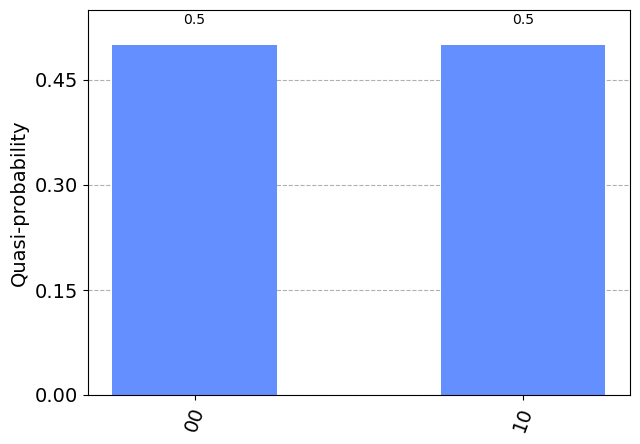

In [8]:
# Construct the simulator: Sometimes there are issues with Aer, in that case use BasicAer
try:
    simulator = qi.Aer.get_backend('statevector_simulator')
except:
    simulator = qi.BasicAer.get_backend('statevector_simulator')

# Run the quantum circuit
simulator_run = simulator.run(circ_1,shots =1000)

# Get the results
result = simulator_run.result()

# Get the output state
output_state = result.get_statevector(circ_1)
# Get the measurement outcomes
measurement_results = result.get_counts()

# The raw results are a dictionary with measurement outcomes as keys and counts as values
# print(measurement_results)
# output_state.draw(output='latex')

counts = result.get_counts(circ_1)
print("\nTotal count for 00 and 11 are:",counts)

m = list(measurement_results.keys())[0]
l = output_state.draw(output='latex_source').replace('\\rangle','>')
print('Measurement outcome: {}, Post-measurement state: {}'.format(m,l))
qi.visualization.plot_histogram(measurement_results)


We note that the results coincide! Now, for the next two-qubit system,

In [15]:
B = Matrix([[two, two, 0, 0], [two, -two, 0, 0], [0, 0, 1, 0],[0, 0, 0, -1]])

In [16]:
display(B * state_vector)

Matrix([
[0.707106781186547*a + 0.707106781186547*b],
[0.707106781186547*a - 0.707106781186547*b],
[                                        c],
[                                       -d]])

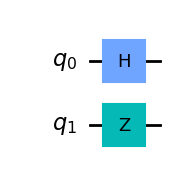

In [17]:
circ_2 = QuantumCircuit(2)
circ_2.z(1)
circ_2.h(0)
circ_2.draw('mpl')

In the standard computational basis, this two-qubit system can be written as,
$$\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} & 0 & 0 \\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix} \begin{pmatrix}
\alpha \\
\beta \\
\gamma \\
\delta
\end{pmatrix} = \begin{pmatrix}
\frac{\alpha}{\sqrt{2}} + \frac{\beta}{\sqrt{2}}\\
\frac{\alpha}{\sqrt{2}} - \frac{\beta}{\sqrt{2}} \\
\gamma \\
-\delta
\end{pmatrix}$$

## 3. Quantum Circuits

A well known identity involving CNOT gates is that,
$$H \otimes H \ CNOT_{1,2} \ H \otimes H = CNOT_{2,1}$$

Applying this to the circuit in the RHS, we have,
$$(\mathbb{I} \otimes H)CNOT_{2,1}(\mathbb{I} \otimes H) = (\mathbb{I} \otimes H)(H \otimes H \ CNOT_{1,2} \ H \otimes H)(\mathbb{I} \otimes H)$$

Since we know that the Hadarmard gate is self-inverse i.e. squares to identity,
$$H^{2} = \mathbb{I}$$
thus we have,
$$(\mathbb{I} \otimes H)CNOT_{2,1}(\mathbb{I} \otimes H) = (H \otimes \mathbb{I}) CNOT_{1,2}(H \otimes \mathbb{I})$$

We know that the CNOT gate can be written in the computational basis as: </br>
$$ CNOT_{1,2} = \mathbb{I} \otimes X = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}$$

$$ CNOT_{2,1} = X \otimes \mathbb{I} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}$$

In [41]:
CNOT_1 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1],[0, 0, 1, 0]])
#CNOT_2 = Matrix([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
CNOT_3 = Matrix([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0],[0, 1, 0, 0]])
Hadamard = 0.5 * Matrix([[1, 1, 1, 1], [1, -1, 1, -1], [1, 1, -1, -1],[1, -1, -1, 1]])
Hadamard_1 = Matrix([[two, two, 0, 0], [two, -two, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
Hadamard_2 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, two, two],[0, 0, two, -two]])

In [42]:
CNOT_4 = Hadamard * CNOT_1 * Hadamard

Thus, to prove the identity we shall first evaluate the LHS,

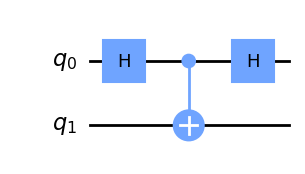

In [20]:
circ_3 = QuantumCircuit(2)
circ_3.h(0)
circ_3.cx(0,1)
circ_3.h(0)
circ_3.draw('mpl')

this can be written as a matrix product,
$$(\mathbb{I} \otimes H )CNOT_{1,2}(\mathbb{I} \otimes H ) = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix}$$

$$(\mathbb{I} \otimes H )CNOT_{1,2}(\mathbb{I} \otimes H ) = $$

In [35]:
display(Hadamard_1 * CNOT_1 * Hadamard_1 * state_vector)

Matrix([
[1.0*a],
[1.0*b],
[    d],
[    c]])

Now to evaluate the RHS,

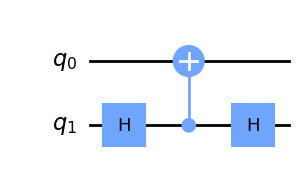

In [19]:
circ_4 = QuantumCircuit(2)
circ_4.h(1)
circ_4.cx(1,0)
circ_4.h(1)
circ_4.draw('mpl')

this can be written as a matrix product,
$$(H \otimes \mathbb{I})CNOT_{2,1}(H \otimes \mathbb{I}) = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix} \begin{pmatrix}
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix}$$

$$(H \otimes \mathbb{I})CNOT_{2,1}(H \otimes \mathbb{I}) = $$

In [43]:
display(Hadamard_2 * CNOT_4 * Hadamard_2 * state_vector)

Matrix([
[                                    1.0*a],
[0.707106781186547*c - 0.707106781186547*d],
[      0.707106781186547*b + 0.5*c + 0.5*d],
[     -0.707106781186547*b + 0.5*c + 0.5*d]])

Proving their equivalence upto the equivalence of statevectors and unitary matrices using qiskit,

In [36]:
#checking if both the circuits produce the same state vectors
from qiskit.quantum_info import Statevector
Statevector.from_instruction(circ_3).equiv(Statevector.from_instruction(circ_4))

True

In [38]:
#checking if both the circuits produce the unitary matrix
backend_sim = Aer.get_backend('unitary_simulator')
job_sim = qi.execute([circ_3, circ_4], backend_sim)
result_sim = job_sim.result()
unitary1 = result_sim.get_unitary(circ_3)
unitary2 = result_sim.get_unitary(circ_4)

np.allclose(unitary1, unitary2) 

True

## 4. No-Cloning Theorem